In [1]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
response = requests.get('https://api.binance.com/api/v1/exchangeInfo')

In [5]:
response.json()

{'timezone': 'UTC',
 'serverTime': 1642821258415,
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 50},
  {'rateLimitType': 'ORDERS',
   'interval': 'DAY',
   'intervalNum': 1,
   'limit': 160000},
  {'rateLimitType': 'RAW_REQUESTS',
   'interval': 'MINUTE',
   'intervalNum': 5,
   'limit': 6100}],
 'exchangeFilters': [],
 'symbols': [{'symbol': 'ETHBTC',
   'status': 'TRADING',
   'baseAsset': 'ETH',
   'baseAssetPrecision': 8,
   'quoteAsset': 'BTC',
   'quotePrecision': 8,
   'quoteAssetPrecision': 8,
   'baseCommissionPrecision': 8,
   'quoteCommissionPrecision': 8,
   'orderTypes': ['LIMIT',
    'LIMIT_MAKER',
    'MARKET',
    'STOP_LOSS_LIMIT',
    'TAKE_PROFIT_LIMIT'],
   'icebergAllowed': True,
   'ocoAllowed': True,
   'quoteOrderQtyMarketAllowed': True,
   'isSpotTradingAllowed': True,
   'isMarginTradingAllowed': True,


In [3]:
# get spot symbol list
binance_symbol_list_spot=pd.DataFrame(response.json()['symbols'])

In [4]:
binance_symbol_list_spot.head(3)

,symbol,status,baseAsset,baseAssetPrecision,quoteAsset,quotePrecision,quoteAssetPrecision,baseCommissionPrecision,quoteCommissionPrecision,orderTypes,icebergAllowed,ocoAllowed,quoteOrderQtyMarketAllowed,isSpotTradingAllowed,isMarginTradingAllowed,filters,permissions
0,ETHBTC,TRADING,ETH,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"
1,LTCBTC,TRADING,LTC,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"
2,BNBBTC,TRADING,BNB,8,BTC,8,8,8,8,"[LIMIT, LIMIT_MAKER, MARKET, STOP_LOSS_LIMIT, ...",True,True,True,True,True,"[{'filterType': 'PRICE_FILTER', 'minPrice': '0...","[SPOT, MARGIN]"


In [6]:
# find symbol list containing ADA
binance_symbol_list_spot[binance_symbol_list_spot['symbol'].str.contains('ETH')]['symbol'].to_list()

['ETHBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'BNBETH',
 'ETHUSDT',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'ICNETH',
 'WTCETH',
 'LRCETH',
 'OMGETH',
 'ZRXETH',
 'STRATETH',
 'SNGLSETH',
 'BQXETH',
 'KNCETH',
 'FUNETH',
 'SNMETH',
 'NEOETH',
 'IOTAETH',
 'LINKETH',
 'XVGETH',
 'SALTETH',
 'MDAETH',
 'MTLETH',
 'SUBETH',
 'ETCETH',
 'MTHETH',
 'ENGETH',
 'ZECETH',
 'ASTETH',
 'DASHETH',
 'BTGETH',
 'EVXETH',
 'REQETH',
 'VIBETH',
 'HSRETH',
 'TRXETH',
 'POWRETH',
 'ARKETH',
 'YOYOETH',
 'XRPETH',
 'MODETH',
 'ENJETH',
 'STORJETH',
 'VENETH',
 'KMDETH',
 'RCNETH',
 'NULSETH',
 'RDNETH',
 'XMRETH',
 'DLTETH',
 'AMBETH',
 'BCCETH',
 'BATETH',
 'BCPTETH',
 'ARNETH',
 'GVTETH',
 'CDTETH',
 'GXSETH',
 'POEETH',
 'QSPETH',
 'BTSETH',
 'XZCETH',
 'LSKETH',
 'TNTETH',
 'FUELETH',
 'MANAETH',
 'BCDETH',
 'DGDETH',
 'ADXETH',
 'ADAETH',
 'PPTETH',
 'CMTETH',
 'XLMETH',
 'CNDETH',
 'LENDETH',
 'WABIETH',
 'LTCETH',
 'TNBETH',
 'WAVESETH',
 'GTOETH',
 'ICXETH',
 'OSTETH',
 'ELFETH',
 'AIONETH'

In [7]:
# download historical data
spot_api = 'https://api.binance.com/api/v3/klines'

In [8]:
symbol='ETHBTC'   # this is SPOT symbol

params = {
  'symbol': symbol,
  'interval': '1w'    # 1m, 3m, 5m, 15m, 30m, 1h, 2h, 4h, 6h, 8h, 12h, 1d, 3d, 1w, 1M
}
response = requests.get(spot_api, params=params)    # So we used spot api link
# Turn data into dataframe
data=pd.DataFrame.from_records(response.json(),columns=['Open_time','Open','High','Low','Close','Volume','Close_time','asset_volume','number_of_trades','buy_base_vol','buy_quote_vol','ignore'])


In [9]:
data.head()

,Open_time,Open,High,Low,Close,Volume,Close_time,asset_volume,number_of_trades,buy_base_vol,buy_quote_vol,ignore
0,1499644800000,0.08000000,0.09369900,0.07559100,0.08224100,14859.28100000,1500249599999,1255.48279377,14754,8884.29800000,748.71065665,22295.47295841
1,1500249600000,0.08236800,0.10906800,0.07498200,0.08353300,49431.89700000,1500854399999,4327.14317201,54321,29901.52000000,2622.65967296,22494.29294971
2,1500854400000,0.08343800,0.08397300,0.06433500,0.07010900,69342.17800000,1501459199999,5239.21152518,72039,37110.08000000,2810.49302321,25973.49745228
3,1501459200000,0.07040600,0.08526000,0.06759000,0.08102900,88661.94700000,1502063999999,6940.64207614,89359,44653.55700000,3496.13610006,27058.31831125
4,1502064000000,0.08102900,0.09357800,0.06800700,0.07382400,114725.15100000,1502668799999,9492.80829963,110031,56600.31900000,4680.71773223,40432.13669564


In [10]:
# Time Columns are in timestamp format, we need to convert them to datetime
# https://www.epochconverter.com/
data['Open_time']=[datetime.fromtimestamp(timestamp/1000) for timestamp in data['Open_time']]
data['Close_time']=[datetime.fromtimestamp(timestamp/1000) for timestamp in data['Close_time']]
# Turn other columns into float
data[['Open','High','Low','Close','Volume','asset_volume','number_of_trades','buy_base_vol','buy_quote_vol']]=data[['Open','High','Low','Close','Volume','asset_volume','number_of_trades','buy_base_vol','buy_quote_vol']].astype(float)


data.set_index('Open_time', inplace=True)

data

,Open,High,Low,Close,Volume,Close_time,asset_volume,number_of_trades,buy_base_vol,buy_quote_vol,ignore
Open_time,,,,,,,,,,,
2017-07-10 08:00:00,0.080000,0.093699,0.075591,0.082241,14859.2810,2017-07-17 07:59:59.999,1255.482794,14754.0,8884.2980,748.710657,22295.47295841
2017-07-17 08:00:00,0.082368,0.109068,0.074982,0.083533,49431.8970,2017-07-24 07:59:59.999,4327.143172,54321.0,29901.5200,2622.659673,22494.29294971
2017-07-24 08:00:00,0.083438,0.083973,0.064335,0.070109,69342.1780,2017-07-31 07:59:59.999,5239.211525,72039.0,37110.0800,2810.493023,25973.49745228
2017-07-31 08:00:00,0.070406,0.085260,0.067590,0.081029,88661.9470,2017-08-07 07:59:59.999,6940.642076,89359.0,44653.5570,3496.136100,27058.31831125
2017-08-07 08:00:00,0.081029,0.093578,0.068007,0.073824,114725.1510,2017-08-14 07:59:59.999,9492.808300,110031.0,56600.3190,4680.717732,40432.13669564
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20 08:00:00,0.084058,0.084764,0.079300,0.080029,359283.2029,2021-12-27 07:59:59.999,29314.541339,885606.0,176037.1152,14369.253682,0
2021-12-27 08:00:00,0.080037,0.081222,0.077950,0.080962,354718.5802,2022-01-03 07:59:59.999,28160.894584,807935.0,177260.1946,14074.780928,0
2022-01-03 08:00:00,0.080963,0.082920,0.073470,0.075293,494911.3088,2022-01-10 07:59:59.999,38858.311817,1127469.0,233725.4676,18360.585513,0


Text(0.5, 1.0, 'ETHBTC weekly plot')

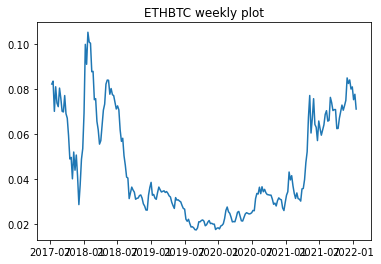

In [11]:
plt.plot(data['Close'])
plt.title(f'{symbol} weekly plot')